# Numerical solution of the wine cellar problem

Solve
$$
u_t = \kappa u~_{xx}
$$

on the semi-infinite domain with $T(0, t) = a \cos(\omega t)$, $|T(x, t)|$ bounded and $T(x, 0) = 0$

Note that there is a condition known as the CFL condition which requires that for the heat equation, we need $\Delta t \leq \Delta x^2/(2 \kappa)$ in order to ensure stability.

Need dt less than  0.01874219075385256


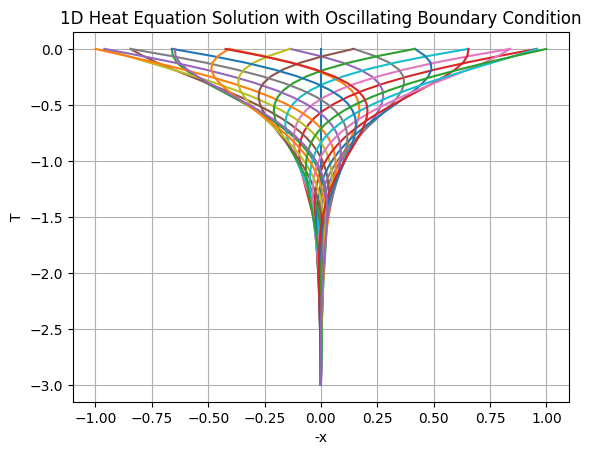

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to solve heat equation using finite differences
def solve_heat_equation(u_initial):
    u_new = np.copy(u_initial)
    for i in range(1, nx - 1):
        u_new[i] = u_initial[i] + D * (dt/dx**2) * (u_initial[i+1] - 2*u_initial[i] + u_initial[i-1])
    return u_new

# Parameters
L = 3.0  # Length of the domain
nx = 50  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
nt = 5000  # Number of time steps
dt = 0.01  # Time step size
k = 200  # Plotting frequency
D = 0.1  # Diffusion coefficient

# What is the CFL condition? 
print("Need dt less than ", dx**2/(2*D))

# Initialize arrays
x = np.linspace(0, L, nx) # Boundary condition at x=0
u_initial = 0 + np.zeros(nx)

# Solve heat equation and plot solution every k timesteps
u = u_initial
t = 0
for tcount in range(nt):
    if tcount % k == 0:
        plt.plot(u, -x, label=f'Timestep {t}')
    u[0] = np.cos(t)
    u = solve_heat_equation(u)
    # Update boundary condition at x=0 with cos(t)
    t = t + dt
    
    

# Plot final solution
plt.xlabel('-x')
plt.ylabel('T')
plt.title('1D Heat Equation Solution with Oscillating Boundary Condition')
plt.grid(True)
plt.show()
